In [1]:
# importing libaries

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.rnn(x, hidden)
        output = self.fc(output)
        return output, hidden


In [3]:
# Toy problem data
input_size = 256  # number of columns in a dataset
hidden_size = 32  # number of neurons
output_size = 256  
sequence_length = 160  # number of sequences/ number of rows
batch_size = 1
num_epochs = 20000

In [4]:
# importing data

In [5]:
# Load the .mat file
v_data = scipy.io.loadmat('v.mat')
h_data = scipy.io.loadmat('h.mat')
x_data = scipy.io.loadmat('x.mat')
h_data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Jul 20 15:02:48 2023',
 '__version__': '1.0',
 '__globals__': [],
 'h': array([[0.03949907, 0.03945555, 0.03968762, ..., 0.04081577, 0.04034067,
         0.03995187],
        [0.03949522, 0.03972834, 0.04007071, ..., 0.0406224 , 0.0405568 ,
         0.04021852],
        [0.03980837, 0.03966293, 0.04008707, ..., 0.04077249, 0.04050591,
         0.04019281],
        ...,
        [0.04915863, 0.04935256, 0.04961976, ..., 0.04917885, 0.04899574,
         0.04881741],
        [0.04904458, 0.04916197, 0.04943338, ..., 0.04902097, 0.04897786,
         0.04875013],
        [0.04913692, 0.04932824, 0.04941899, ..., 0.04888785, 0.0488357 ,
         0.04855312]])}

In [6]:
x = x_data['X']
u = h_data['h']

In [7]:
print(x.shape)
print(u.shape)
u

(201, 256)
(201, 256)


array([[0.03949907, 0.03945555, 0.03968762, ..., 0.04081577, 0.04034067,
        0.03995187],
       [0.03949522, 0.03972834, 0.04007071, ..., 0.0406224 , 0.0405568 ,
        0.04021852],
       [0.03980837, 0.03966293, 0.04008707, ..., 0.04077249, 0.04050591,
        0.04019281],
       ...,
       [0.04915863, 0.04935256, 0.04961976, ..., 0.04917885, 0.04899574,
        0.04881741],
       [0.04904458, 0.04916197, 0.04943338, ..., 0.04902097, 0.04897786,
        0.04875013],
       [0.04913692, 0.04932824, 0.04941899, ..., 0.04888785, 0.0488357 ,
        0.04855312]])

In [8]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [9]:
input_data = u[0:160,:]
target_data = u[1:161, :]

test_data = u[160:200, :]
test_target = u[161:201, :]

print("test data shape", test_data.shape)
print("test target shape", test_target.shape)

print("input data shape",input_data.shape)
print("Target data shape",target_data.shape)

test data shape (40, 256)
test target shape (40, 256)
input data shape (160, 256)
Target data shape (160, 256)


In [10]:
# Convert data to tensors
input_tensor = torch.tensor(input_data).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data).view(batch_size, sequence_length, output_size).float()

print("input tensor shape",input_tensor.shape)
print("Target tensor shape",target_tensor.shape)

input tensor shape torch.Size([1, 160, 256])
Target tensor shape torch.Size([1, 160, 256])


In [11]:
# Convert test data to tensors
test_tensor = torch.tensor(test_data).view(batch_size, 40, input_size).float()
test_target_tensor = torch.tensor(test_target).view(batch_size, 40, output_size).float()


In [12]:
# Create RNN instance
rnn = RNN(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    # Set initial hidden state
    hidden = torch.zeros(1, batch_size, hidden_size)

    # Forward pass
    output, hidden = rnn(input_tensor, hidden)
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')


Epoch: 10/20000, Loss: 0.1034
Epoch: 20/20000, Loss: 0.0575
Epoch: 30/20000, Loss: 0.0340
Epoch: 40/20000, Loss: 0.0237
Epoch: 50/20000, Loss: 0.0118
Epoch: 60/20000, Loss: 0.0046
Epoch: 70/20000, Loss: 0.0021
Epoch: 80/20000, Loss: 0.0012
Epoch: 90/20000, Loss: 0.0009
Epoch: 100/20000, Loss: 0.0008
Epoch: 110/20000, Loss: 0.0007
Epoch: 120/20000, Loss: 0.0006
Epoch: 130/20000, Loss: 0.0006
Epoch: 140/20000, Loss: 0.0006
Epoch: 150/20000, Loss: 0.0006
Epoch: 160/20000, Loss: 0.0006
Epoch: 170/20000, Loss: 0.0006
Epoch: 180/20000, Loss: 0.0005
Epoch: 190/20000, Loss: 0.0005
Epoch: 200/20000, Loss: 0.0005
Epoch: 210/20000, Loss: 0.0005
Epoch: 220/20000, Loss: 0.0005
Epoch: 230/20000, Loss: 0.0005
Epoch: 240/20000, Loss: 0.0005
Epoch: 250/20000, Loss: 0.0005
Epoch: 260/20000, Loss: 0.0005
Epoch: 270/20000, Loss: 0.0005
Epoch: 280/20000, Loss: 0.0005
Epoch: 290/20000, Loss: 0.0029
Epoch: 300/20000, Loss: 0.0014
Epoch: 310/20000, Loss: 0.0005
Epoch: 320/20000, Loss: 0.0005
Epoch: 330/20000,

Epoch: 2610/20000, Loss: 0.0000
Epoch: 2620/20000, Loss: 0.0000
Epoch: 2630/20000, Loss: 0.0004
Epoch: 2640/20000, Loss: 0.0008
Epoch: 2650/20000, Loss: 0.0003
Epoch: 2660/20000, Loss: 0.0001
Epoch: 2670/20000, Loss: 0.0001
Epoch: 2680/20000, Loss: 0.0001
Epoch: 2690/20000, Loss: 0.0000
Epoch: 2700/20000, Loss: 0.0000
Epoch: 2710/20000, Loss: 0.0000
Epoch: 2720/20000, Loss: 0.0000
Epoch: 2730/20000, Loss: 0.0000
Epoch: 2740/20000, Loss: 0.0000
Epoch: 2750/20000, Loss: 0.0000
Epoch: 2760/20000, Loss: 0.0001
Epoch: 2770/20000, Loss: 0.0000
Epoch: 2780/20000, Loss: 0.0000
Epoch: 2790/20000, Loss: 0.0000
Epoch: 2800/20000, Loss: 0.0000
Epoch: 2810/20000, Loss: 0.0000
Epoch: 2820/20000, Loss: 0.0000
Epoch: 2830/20000, Loss: 0.0002
Epoch: 2840/20000, Loss: 0.0001
Epoch: 2850/20000, Loss: 0.0000
Epoch: 2860/20000, Loss: 0.0000
Epoch: 2870/20000, Loss: 0.0000
Epoch: 2880/20000, Loss: 0.0000
Epoch: 2890/20000, Loss: 0.0000
Epoch: 2900/20000, Loss: 0.0000
Epoch: 2910/20000, Loss: 0.0001
Epoch: 2

Epoch: 5190/20000, Loss: 0.0000
Epoch: 5200/20000, Loss: 0.0000
Epoch: 5210/20000, Loss: 0.0000
Epoch: 5220/20000, Loss: 0.0011
Epoch: 5230/20000, Loss: 0.0002
Epoch: 5240/20000, Loss: 0.0002
Epoch: 5250/20000, Loss: 0.0000
Epoch: 5260/20000, Loss: 0.0000
Epoch: 5270/20000, Loss: 0.0000
Epoch: 5280/20000, Loss: 0.0000
Epoch: 5290/20000, Loss: 0.0000
Epoch: 5300/20000, Loss: 0.0000
Epoch: 5310/20000, Loss: 0.0000
Epoch: 5320/20000, Loss: 0.0000
Epoch: 5330/20000, Loss: 0.0004
Epoch: 5340/20000, Loss: 0.0003
Epoch: 5350/20000, Loss: 0.0002
Epoch: 5360/20000, Loss: 0.0001
Epoch: 5370/20000, Loss: 0.0000
Epoch: 5380/20000, Loss: 0.0000
Epoch: 5390/20000, Loss: 0.0000
Epoch: 5400/20000, Loss: 0.0000
Epoch: 5410/20000, Loss: 0.0000
Epoch: 5420/20000, Loss: 0.0000
Epoch: 5430/20000, Loss: 0.0003
Epoch: 5440/20000, Loss: 0.0001
Epoch: 5450/20000, Loss: 0.0001
Epoch: 5460/20000, Loss: 0.0000
Epoch: 5470/20000, Loss: 0.0000
Epoch: 5480/20000, Loss: 0.0000
Epoch: 5490/20000, Loss: 0.0000
Epoch: 5

Epoch: 7760/20000, Loss: 0.0000
Epoch: 7770/20000, Loss: 0.0000
Epoch: 7780/20000, Loss: 0.0000
Epoch: 7790/20000, Loss: 0.0000
Epoch: 7800/20000, Loss: 0.0000
Epoch: 7810/20000, Loss: 0.0000
Epoch: 7820/20000, Loss: 0.0000
Epoch: 7830/20000, Loss: 0.0000
Epoch: 7840/20000, Loss: 0.0000
Epoch: 7850/20000, Loss: 0.0000
Epoch: 7860/20000, Loss: 0.0003
Epoch: 7870/20000, Loss: 0.0001
Epoch: 7880/20000, Loss: 0.0000
Epoch: 7890/20000, Loss: 0.0000
Epoch: 7900/20000, Loss: 0.0000
Epoch: 7910/20000, Loss: 0.0002
Epoch: 7920/20000, Loss: 0.0001
Epoch: 7930/20000, Loss: 0.0000
Epoch: 7940/20000, Loss: 0.0000
Epoch: 7950/20000, Loss: 0.0000
Epoch: 7960/20000, Loss: 0.0000
Epoch: 7970/20000, Loss: 0.0004
Epoch: 7980/20000, Loss: 0.0002
Epoch: 7990/20000, Loss: 0.0000
Epoch: 8000/20000, Loss: 0.0000
Epoch: 8010/20000, Loss: 0.0000
Epoch: 8020/20000, Loss: 0.0001
Epoch: 8030/20000, Loss: 0.0001
Epoch: 8040/20000, Loss: 0.0002
Epoch: 8050/20000, Loss: 0.0000
Epoch: 8060/20000, Loss: 0.0000
Epoch: 8

Epoch: 10340/20000, Loss: 0.0001
Epoch: 10350/20000, Loss: 0.0000
Epoch: 10360/20000, Loss: 0.0000
Epoch: 10370/20000, Loss: 0.0002
Epoch: 10380/20000, Loss: 0.0012
Epoch: 10390/20000, Loss: 0.0019
Epoch: 10400/20000, Loss: 0.0012
Epoch: 10410/20000, Loss: 0.0003
Epoch: 10420/20000, Loss: 0.0001
Epoch: 10430/20000, Loss: 0.0001
Epoch: 10440/20000, Loss: 0.0000
Epoch: 10450/20000, Loss: 0.0013
Epoch: 10460/20000, Loss: 0.0002
Epoch: 10470/20000, Loss: 0.0001
Epoch: 10480/20000, Loss: 0.0001
Epoch: 10490/20000, Loss: 0.0000
Epoch: 10500/20000, Loss: 0.0000
Epoch: 10510/20000, Loss: 0.0000
Epoch: 10520/20000, Loss: 0.0000
Epoch: 10530/20000, Loss: 0.0000
Epoch: 10540/20000, Loss: 0.0002
Epoch: 10550/20000, Loss: 0.0001
Epoch: 10560/20000, Loss: 0.0000
Epoch: 10570/20000, Loss: 0.0000
Epoch: 10580/20000, Loss: 0.0000
Epoch: 10590/20000, Loss: 0.0000
Epoch: 10600/20000, Loss: 0.0000
Epoch: 10610/20000, Loss: 0.0001
Epoch: 10620/20000, Loss: 0.0000
Epoch: 10630/20000, Loss: 0.0000
Epoch: 106

Epoch: 12850/20000, Loss: 0.0001
Epoch: 12860/20000, Loss: 0.0002
Epoch: 12870/20000, Loss: 0.0001
Epoch: 12880/20000, Loss: 0.0000
Epoch: 12890/20000, Loss: 0.0000
Epoch: 12900/20000, Loss: 0.0001
Epoch: 12910/20000, Loss: 0.0002
Epoch: 12920/20000, Loss: 0.0001
Epoch: 12930/20000, Loss: 0.0000
Epoch: 12940/20000, Loss: 0.0000
Epoch: 12950/20000, Loss: 0.0001
Epoch: 12960/20000, Loss: 0.0002
Epoch: 12970/20000, Loss: 0.0001
Epoch: 12980/20000, Loss: 0.0000
Epoch: 12990/20000, Loss: 0.0000
Epoch: 13000/20000, Loss: 0.0001
Epoch: 13010/20000, Loss: 0.0002
Epoch: 13020/20000, Loss: 0.0001
Epoch: 13030/20000, Loss: 0.0001
Epoch: 13040/20000, Loss: 0.0002
Epoch: 13050/20000, Loss: 0.0001
Epoch: 13060/20000, Loss: 0.0000
Epoch: 13070/20000, Loss: 0.0000
Epoch: 13080/20000, Loss: 0.0000
Epoch: 13090/20000, Loss: 0.0002
Epoch: 13100/20000, Loss: 0.0001
Epoch: 13110/20000, Loss: 0.0001
Epoch: 13120/20000, Loss: 0.0000
Epoch: 13130/20000, Loss: 0.0000
Epoch: 13140/20000, Loss: 0.0000
Epoch: 131

Epoch: 15370/20000, Loss: 0.0001
Epoch: 15380/20000, Loss: 0.0002
Epoch: 15390/20000, Loss: 0.0001
Epoch: 15400/20000, Loss: 0.0000
Epoch: 15410/20000, Loss: 0.0000
Epoch: 15420/20000, Loss: 0.0006
Epoch: 15430/20000, Loss: 0.0001
Epoch: 15440/20000, Loss: 0.0000
Epoch: 15450/20000, Loss: 0.0000
Epoch: 15460/20000, Loss: 0.0000
Epoch: 15470/20000, Loss: 0.0002
Epoch: 15480/20000, Loss: 0.0001
Epoch: 15490/20000, Loss: 0.0001
Epoch: 15500/20000, Loss: 0.0000
Epoch: 15510/20000, Loss: 0.0000
Epoch: 15520/20000, Loss: 0.0000
Epoch: 15530/20000, Loss: 0.0000
Epoch: 15540/20000, Loss: 0.0004
Epoch: 15550/20000, Loss: 0.0002
Epoch: 15560/20000, Loss: 0.0001
Epoch: 15570/20000, Loss: 0.0000
Epoch: 15580/20000, Loss: 0.0000
Epoch: 15590/20000, Loss: 0.0000
Epoch: 15600/20000, Loss: 0.0001
Epoch: 15610/20000, Loss: 0.0000
Epoch: 15620/20000, Loss: 0.0012
Epoch: 15630/20000, Loss: 0.0003
Epoch: 15640/20000, Loss: 0.0001
Epoch: 15650/20000, Loss: 0.0000
Epoch: 15660/20000, Loss: 0.0000
Epoch: 156

Epoch: 17890/20000, Loss: 0.0001
Epoch: 17900/20000, Loss: 0.0000
Epoch: 17910/20000, Loss: 0.0000
Epoch: 17920/20000, Loss: 0.0001
Epoch: 17930/20000, Loss: 0.0003
Epoch: 17940/20000, Loss: 0.0001
Epoch: 17950/20000, Loss: 0.0001
Epoch: 17960/20000, Loss: 0.0000
Epoch: 17970/20000, Loss: 0.0000
Epoch: 17980/20000, Loss: 0.0001
Epoch: 17990/20000, Loss: 0.0000
Epoch: 18000/20000, Loss: 0.0001
Epoch: 18010/20000, Loss: 0.0001
Epoch: 18020/20000, Loss: 0.0002
Epoch: 18030/20000, Loss: 0.0001
Epoch: 18040/20000, Loss: 0.0000
Epoch: 18050/20000, Loss: 0.0001
Epoch: 18060/20000, Loss: 0.0005
Epoch: 18070/20000, Loss: 0.0003
Epoch: 18080/20000, Loss: 0.0001
Epoch: 18090/20000, Loss: 0.0000
Epoch: 18100/20000, Loss: 0.0000
Epoch: 18110/20000, Loss: 0.0000
Epoch: 18120/20000, Loss: 0.0001
Epoch: 18130/20000, Loss: 0.0000
Epoch: 18140/20000, Loss: 0.0000
Epoch: 18150/20000, Loss: 0.0002
Epoch: 18160/20000, Loss: 0.0001
Epoch: 18170/20000, Loss: 0.0000
Epoch: 18180/20000, Loss: 0.0000
Epoch: 181

(1, 256)
(1, 201)
(256, 201)


/data/localhome/tkapoor/.local/lib/python3.8/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.8/dist-packages/matplotlib/contour.py:1180: ComplexWarning: Casting complex values to real discards the imaginary part
  self.levels = np.asarray(levels_arg).astype(np.float64)


<Figure size 432x288 with 0 Axes>

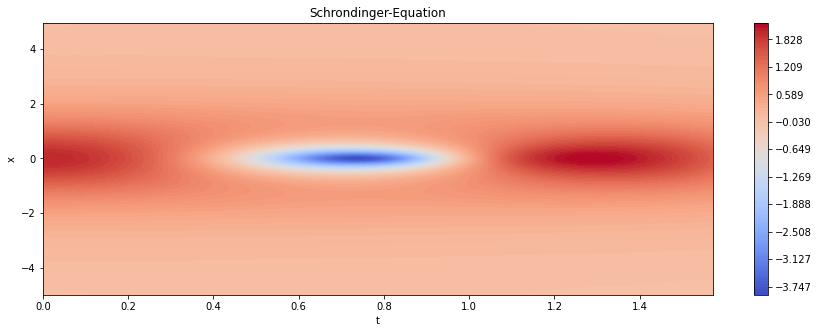

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split

# Load the .mat file
mat_data = scipy.io.loadmat('NLS.mat')

# Following is the code to plot the data u vs x and t. u is 256*100
# matrix. Use first 75 columns for training and 25 for testing :)

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['tt']
u = mat_data['uu']

# Use the loaded variables as needed
print(x.shape)
print(t.shape)
print(u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u), np.max(u), 100)

# Plot the contour
plt.figure()
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Schrondinger-Equation')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

torch.Size([1, 40, 256])
final_time_output torch.Size([40, 256])
torch.Size([256])


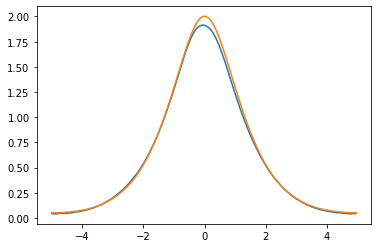

In [16]:
with torch.no_grad():
    hidden_pred = torch.zeros(1, batch_size, hidden_size)
    prediction, _ = rnn(test_tensor, hidden_pred)
print(prediction.shape)

final_time_output = prediction[-1, :]
print("final_time_output", final_time_output.shape)

final_time_output1 = final_time_output[-1, :]
print(final_time_output1.shape)

final_out = final_time_output1.detach().numpy().reshape(-1,)
final_true = u[:,-1].reshape(-1,1)

final_true = np.abs(final_true)
final_out = np.abs(final_out)

plt.plot(x, final_out)
plt.plot(x, final_true)
plt.show()

In [17]:
# Convert NumPy arrays to PyTorch tensors
final_out_tensor = torch.from_numpy(final_out)
final_true_tensor = torch.from_numpy(final_true)
final_true_tensor = torch.abs(final_true_tensor)

# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((final_out_tensor - final_true_tensor)**2)/torch.mean(final_true_tensor**2)
print("Relative Error Test: ", relative_error_test.item(), "")

Relative Error Test:  0.9900342365596204 
